# Task 2: Predict the Optimum no of Clusters for the Iris Dataset

# Author: Keval Kajavadara

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [2]:
# Load the Data
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Remove the unnecessary the column
df = df.drop("Id",axis=1)

In [5]:
x = df.iloc[:,:-1].values

In [6]:
y = df.iloc[:,-1].values

In [7]:
# Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

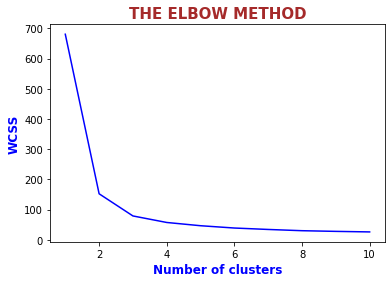

In [8]:
# Plot the Elbow diagram    
plt.plot(range(1, 11), wcss,color='blue')
plt.title('THE ELBOW METHOD',color='brown',font={'size':15,'weight':'bold'})
plt.xlabel('Number of clusters',color='blue',font={'size':12,'weight':'bold'})
plt.ylabel('WCSS',color='blue',font={'size':12,'weight':'bold'})
plt.show()

From the above 'elbow method graph', the optimum clusters is where the elbow occurs. And we can observe that the optimum nos. of clusters is **3**.

In [9]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

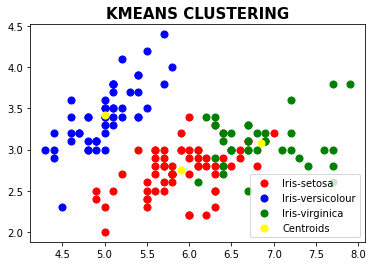

In [10]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')
plt.title("KMEANS CLUSTERING",color='black',font={'size':15,'weight':'bold'})
plt.legend()

# THANK YOU